<a href="https://colab.research.google.com/github/AgusteFatu/burayaneyazcaz/blob/main/week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [160]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor # Import Decision Tree Regression
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [74]:
data = pd.read_csv('https://raw.githubusercontent.com/AgusteFatu/burayaneyazcaz/main/data/epilepsy.csv')
del data['Unnamed: 0']

pd.options.display.float_format = '{:,.2f}'.format

In [59]:
# Example of observations
display(data.head(5))
print("\n{} Rows and {} columns.".format(data.shape[0],data.shape[1]))

,ID,Y1,Y2,Y3,Y4,Base,Age,Trt,Ysum,Age10,Base4
0,104,5,3,3,3,11,31,placebo,14,3.1,2.75
1,106,3,5,3,3,11,30,placebo,14,3.0,2.75
2,107,2,4,0,5,6,25,placebo,11,2.5,1.50
3,114,4,4,1,4,8,36,placebo,13,3.6,2.00
4,116,7,18,9,21,66,22,placebo,55,2.2,16.50



59 Rows and 11 columns.


In [133]:
# info about the index dtype and columns, non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      59 non-null     int64  
 1   Y1      59 non-null     int64  
 2   Y2      59 non-null     int64  
 3   Y3      59 non-null     int64  
 4   Y4      59 non-null     int64  
 5   Base    59 non-null     int64  
 6   Age     59 non-null     int64  
 7   Trt     59 non-null     object 
 8   Ysum    59 non-null     int64  
 9   Age10   59 non-null     float64
 10  Base4   59 non-null     float64
dtypes: float64(2), int64(8), object(1)
memory usage: 5.2+ KB


In [109]:
# Summary of Y1, Y2, Y3 and Y4
data[['Y1','Y2','Y3','Y4']].describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Y1,59.00,8.95,14.84,0.00,2.00,4.00,10.50,102.00
Y2,59.00,8.36,10.19,0.00,3.00,5.00,11.50,65.00
Y3,59.00,8.44,14.15,0.00,2.00,4.00,8.00,76.00
Y4,59.00,7.31,9.65,0.00,3.00,4.00,8.00,63.00


In [111]:
sum(data['Y1'] == 0) + sum(data['Y2'] == 0) + sum(data['Y3'] == 0) + sum(data['Y4'] == 0)

23

In [115]:
# Summary of Base variable
data[['Base']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Base,59.00,31.22,26.88,6.00,12.00,22.00,41.00,151.00


In [119]:
# Summary of Age variable
data[['Age']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,59.00,28.34,6.30,18.00,23.00,28.00,32.00,42.00


In [132]:
# Summary of Trt variable
pd.DataFrame(data['Trt'].value_counts()).transpose()

,progabide,placebo
Trt,31,28


In [134]:
# Summary of Ysum variable
data[['Ysum']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Ysum,59.00,33.05,45.58,0.00,11.50,16.00,36.00,302.00


In [ ]:
data.describe()

In [ ]:
X

In [232]:
# Select feature and target
#X = data.drop(['Ysum','ID'],axis=1)
X = data.drop(['Ysum','ID','Y1','Y2','Y3','Y4'],axis=1)
y = data[['Ysum']]

from sklearn import preprocessing
# Encoding Categorical variables 

le = preprocessing.LabelEncoder()
ycoppy = y.copy()
X['Trt'] = le.fit_transform(X['Trt'])

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

print('Train set length: {}'.format(len(y_train)))
print('Test  set length: {}'.format(len(y_test)))

Train set length: 47
Test  set length: 12


In [234]:
from sklearn.tree import DecisionTreeRegressor # Regression Tree

# Regression Tree Model
regTree = DecisionTreeRegressor(max_depth=4)
regTree = regTree.fit(X, y)

y_train_predicted = regTree.predict(X_train)
y_test_predicted = regTree.predict(X_test)


In [235]:
# Actual and Predicted values
modelEvaluation = y_train.copy()
modelEvaluation['Predicted_train'] = y_train_predicted
modelEvaluation.columns = ['Actual','Predicted_train']
display(modelEvaluation.head(9).transpose())

,36,31,8,17,6,4,54,19,30
Actual,10.00,13.00,22.00,123.00,12.00,55.00,15.00,16.00,7.00
Predicted_train,11.96,11.96,17.78,133.00,11.96,61.33,11.96,17.78,11.96


In [244]:
import sklearn.metrics as m

# Something is worng 
# y_train_MSE =m.mean_squared_error(y_train,y_train_predicted)
# y_test_MSE = m.mean_squared_error(y_test, y_test_predicted)  

# Train and test set MSE
y_train_MSE=  np.mean((np.array(y_train_predicted) - np.array(y_train)) ** 2)
y_test_MSE =  np.mean((np.array(y_test_predicted) - np.array(y_test)) ** 2)


print('Train MSE: {:,.5f}'.format(y_train_MSE))
print('Test MSE: {:,.5f}'.format(y_test_MSE))

Train MSE: 4,712.97262
Test MSE: 522.19287


In [245]:
np.mean((np.array(y_test_predicted) - np.array(y_test)) ** 2)

522.1928738403099

In [ ]:
modelEvaluation  = y_train.copy()
modelEvaluation['Predicted_train'] = y_train_predicted
modelEvaluation.columns = ['Actual','Predicted_train']

modelEvaluation2  = y_test.copy()
modelEvaluation2['Predicted_train'] = y_test_predicted
modelEvaluation2.columns = ['Actual','Predicted_test']


modelEvaluation.head(15).plot(kind='bar',figsize=(7,5))
modelEvaluation2.head(15).plot(kind='bar',figsize=(7,5))
plt.show()

display(modelEvaluation2.head(8))
display(modelEvaluation.head(8))

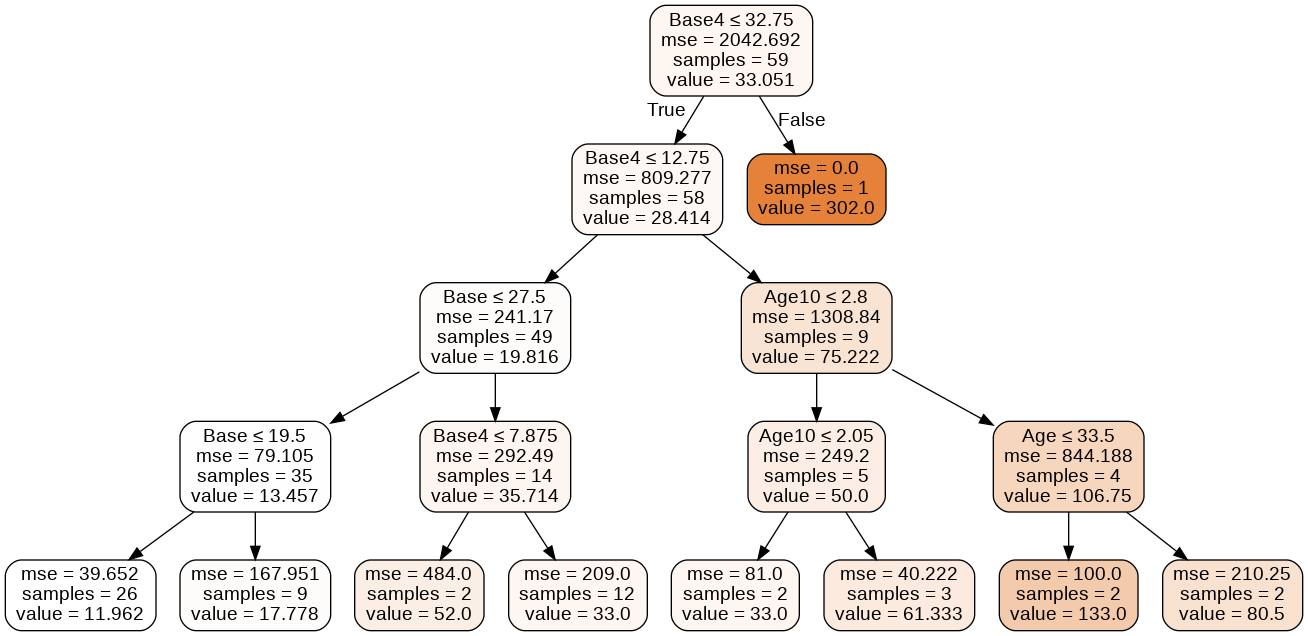

In [247]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()

feature_cols  = X.columns

export_graphviz(regTree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=('epilepsy'))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('epilepsy.png')
Image(graph.create_png())

In [254]:
from sklearn.linear_model import LinearRegression
# Linear Regression Model 
model = LinearRegression()
model.fit(X_train, y_train)

y_train_predicted_LRM = model.predict(X_train)
y_test_predicted_LRM = model.predict(X_test)

import sklearn.metrics as m
y_train_MSE_LRM =m.mean_squared_error(y_train, y_train_predicted_LRM)
y_test_MSE_LRM = m.mean_squared_error(y_test, y_test_predicted_LRM)

# np.mean((np.array(y_train_predicted_LRM) - np.array(y_train)) ** 2)
# np.mean((np.array(y_test_predicted_LRM) - np.array(y_test)) ** 2)

print('Train RMSE: {:,.5f}' .format(np.sqrt(y_train_MSE_LRM)))
print('Test RMSE: {:,.5f}' .format(np.sqrt(y_test_MSE_LRM)))


Train RMSE: 26.44706
Test RMSE: 15.99195


In [273]:
# Tree and LRM RMSE values
tableData = {'Tree RMSE' : [np.sqrt(y_train_MSE),np.sqrt(y_test_MSE)], 'LRM RMSE': [np.sqrt(y_train_MSE_LRM),np.sqrt(y_test_MSE_LRM)]}
table = pd.DataFrame(tableData,index = {'Train set': '0','Test Set': '1'})
table


,Tree RMSE,LRM RMSE
Train set,68.65,26.45
Test Set,22.85,15.99
